In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split

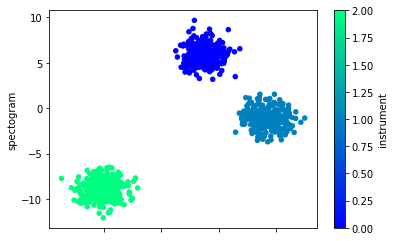

In [4]:
# Prior to modeling, we need to convert the categorical columns, instrument and pitch, into numerical values
# One model for the insturmetDF, and the other for notesDF


# Generate dummy dataset - the instrumentDF
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=78)

# Creating a DataFrame with the dummy data
instrumentDF = pd.DataFrame(X, columns=["instrument", "note", "spectogram"])
instrumentDF["instrument"] = y

# Plotting the dummy data
instrumentDF.plot.scatter(x="note", y="spectogram", c="instrument", colormap="winter")

In [5]:
instrumentDF

,instrument,note,spectogram
0,2,-5.458210,-8.424925
1,1,9.443778,0.417032
2,1,9.682927,-0.995417
3,1,7.413931,-0.233702
4,0,2.798941,5.806519
...,...,...,...
995,2,-4.241836,-9.252090
996,2,-2.896507,-8.548652
997,2,-5.401826,-10.874013
998,2,-6.611909,-8.313026


In [6]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 9

# Number of layers and nodes will depend how many features we have in total (including the image features)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 214
Trainable params: 214
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 2s 2ms/sample - loss: -0.0658 - accuracy: 0.2987
Epoch 2/100
750/750 [==============================] - 0s 125us/sample - loss: -1.5503 - accuracy: 0.3507
Epoch 3/100
750/750 [==============================] - 0s 121us/sample - loss: -2.8749 - accuracy: 0.5360
Epoch 4/100
750/750 [==============================] - 0s 119us/sample - loss: -4.1767 - accuracy: 0.6653
Epoch 5/100
750/750 [==============================] - 0s 132us/sample - loss: -5.6585 - accuracy: 0.6747
Epoch 6/100
750/750 [==============================] - 0s 134us/sample - loss: -7.4330 - accuracy: 0.6747
Epoch 7/100
750/750 [==============================] - 0s 94us/sample - loss: -9.5334 - accuracy: 0.6747
Epoch 8/100
750/750 [==============================] - 0s 120us/sample - loss: -12.0239 - accuracy: 0.6747
Epoch 9/100
750/750 [==============================] - 0s 115us/sample - loss: -14.9494 - accuracy: 0.6747
Epoch 10/100
750/750 [====

750/750 [==============================] - 0s 106us/sample - loss: -8512.4763 - accuracy: 0.6747
Epoch 76/100
750/750 [==============================] - 0s 116us/sample - loss: -8824.3774 - accuracy: 0.6747
Epoch 77/100
750/750 [==============================] - 0s 96us/sample - loss: -9150.4157 - accuracy: 0.6747
Epoch 78/100
750/750 [==============================] - 0s 115us/sample - loss: -9483.4288 - accuracy: 0.6747
Epoch 79/100
750/750 [==============================] - 0s 116us/sample - loss: -9814.4236 - accuracy: 0.6747
Epoch 80/100
750/750 [==============================] - 0s 103us/sample - loss: -10156.5240 - accuracy: 0.6747
Epoch 81/100
750/750 [==============================] - 0s 118us/sample - loss: -10502.0270 - accuracy: 0.6747
Epoch 82/100
750/750 [==============================] - 0s 105us/sample - loss: -10860.2147 - accuracy: 0.6747
Epoch 83/100
750/750 [==============================] - 0s 109us/sample - loss: -11218.4597 - accuracy: 0.6747
Epoch 84/100
750/750

In [9]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


250/250 - 0s - loss: -2.3018e+04 - accuracy: 0.3400
Loss: -23018.0295078125, Accuracy: 0.3400000035762787


In [11]:
# create dummy dataset for notesDF

X2, y2 = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)


notesDF = instrumentDF[['note', 'spectogram']].copy()
notesDF["note"] = y2


In [12]:
notesDF

,note,spectogram
0,1,-8.424925
1,0,0.417032
2,0,-0.995417
3,1,-0.233702
4,1,5.806519
...,...,...
995,1,-9.252090
996,0,-8.548652
997,1,-10.874013
998,0,-8.313026


In [12]:
# split dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=78)

In [13]:
# Create scaler instance
X_scaler2 = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler2.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [14]:
# Define the model - deep neural net
number_input_features2 = len(X_train2[0])
hidden_nodes_layer1_2 =  15
hidden_nodes_layer2_2= 9

# Number of layers and nodes will depend how many features we have in total (including the image features)

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_2, input_dim=number_input_features2, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_2, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                45        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 144       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model2 = nn2.fit(X_train2,y_train2,epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7085 - accuracy: 0.5067
Epoch 2/100
750/750 [==============================] - 0s 74us/sample - loss: 0.5105 - accuracy: 0.5067
Epoch 3/100
750/750 [==============================] - 0s 70us/sample - loss: 0.4238 - accuracy: 0.5067
Epoch 4/100
750/750 [==============================] - 0s 77us/sample - loss: 0.3842 - accuracy: 0.5067
Epoch 5/100
750/750 [==============================] - 0s 96us/sample - loss: 0.3613 - accuracy: 0.5493
Epoch 6/100
750/750 [==============================] - 0s 100us/sample - loss: 0.3449 - accuracy: 0.7840
Epoch 7/100
750/750 [==============================] - 0s 88us/sample - loss: 0.3323 - accuracy: 0.9400
Epoch 8/100
750/750 [==============================] - 0s 90us/sample - loss: 0.3220 - accuracy: 0.9720
Epoch 9/100
750/750 [==============================] - 0s 84us/sample - loss: 0.3132 - accuracy: 0.9867
Epoch 10/100
750/750 [=====================

In [17]:
# Evaluate the model using the test data
model_loss2, model_accuracy2 = nn2.evaluate(X_test2,y_test2,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

250/250 - 0s - loss: 0.0186 - accuracy: 1.0000
Loss: 0.018573604501783848, Accuracy: 1.0
